In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('austo_automobile+(2)+(1).csv')


# A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [3]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [4]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [5]:
df.shape

(1581, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [7]:
df.nunique()

Age                  33
Gender                4
Profession            2
Marital_status        2
Education             2
No_of_Dependents      5
Personal_loan         2
House_loan            2
Partner_working       2
Salary              538
Partner_salary      149
Total_salary        754
Price                53
Make                  3
dtype: int64

In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER :  4
Femal        1
Femle        1
Female     327
Male      1199
Name: Gender, dtype: int64


PROFESSION :  2
Business    685
Salaried    896
Name: Profession, dtype: int64


MARITAL_STATUS :  2
Single      138
Married    1443
Name: Marital_status, dtype: int64


EDUCATION :  2
Graduate         596
Post Graduate    985
Name: Education, dtype: int64


PERSONAL_LOAN :  2
No     789
Yes    792
Name: Personal_loan, dtype: int64


HOUSE_LOAN :  2
Yes     527
No     1054
Name: House_loan, dtype: int64


PARTNER_WORKING :  2
No     713
Yes    868
Name: Partner_working, dtype: int64


MAKE :  3
SUV          297
Hatchback    582
Sedan        702
Name: Make, dtype: int64




In [9]:
#changing the data type of 'no. of dependents'
df['No_of_Dependents']=df['No_of_Dependents'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1581 non-null   int64   
 1   Gender            1528 non-null   object  
 2   Profession        1581 non-null   object  
 3   Marital_status    1581 non-null   object  
 4   Education         1581 non-null   object  
 5   No_of_Dependents  1581 non-null   category
 6   Personal_loan     1581 non-null   object  
 7   House_loan        1581 non-null   object  
 8   Partner_working   1581 non-null   object  
 9   Salary            1581 non-null   int64   
 10  Partner_salary    1475 non-null   float64 
 11  Total_salary      1581 non-null   int64   
 12  Price             1581 non-null   int64   
 13  Make              1581 non-null   object  
dtypes: category(1), float64(1), int64(4), object(8)
memory usage: 162.4+ KB


# B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.



In [11]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [12]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


Data frame has been loaded correctly

In [13]:
#check for duplicates and null values
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,5.0,2.0,557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


There are missing values in one categorical variable 'Gender' and one numerical variable 'Partner Salary' 

Bad data: 4 values in the category 'Gender'

##  Bad data

In [16]:
# 4 values in gender. 
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [17]:
#Replace Femal and Femle to Female. 
df['Gender'].replace('Femal','Female',inplace=True)
df['Gender'].replace('Femle','Female',inplace=True)

## Missing Value

### Gender

In [18]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [19]:
df['Gender'].replace(np.nan, df['Gender'].mode()[0],inplace=True)

In [20]:
df['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

### Partner Salary

In [21]:
list1= df[df['Partner_salary'].isnull()].index
list1

Int64Index([  40,   43,   49,   59,  111,  115,  163,  164,  165,  205,
            ...
            1467, 1540, 1546, 1556, 1558, 1559, 1567, 1568, 1577, 1579],
           dtype='int64', length=106)

In [22]:
for i in list1:
    df['Partner_salary'].iloc[i]=df['Total_salary'].iloc[i]-df['Salary'].iloc[i]

In [23]:
df['Partner_salary'].isnull().sum()

0

.

In [24]:
df[(df['Marital_status']=='Single' ) & (df['Partner_working']=='Yes')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


 No discrepancies here. 

In [25]:
df[df['Total_salary']!=df['Salary']+df['Partner_salary']]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


No discrepances here as well.

In [26]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

# C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

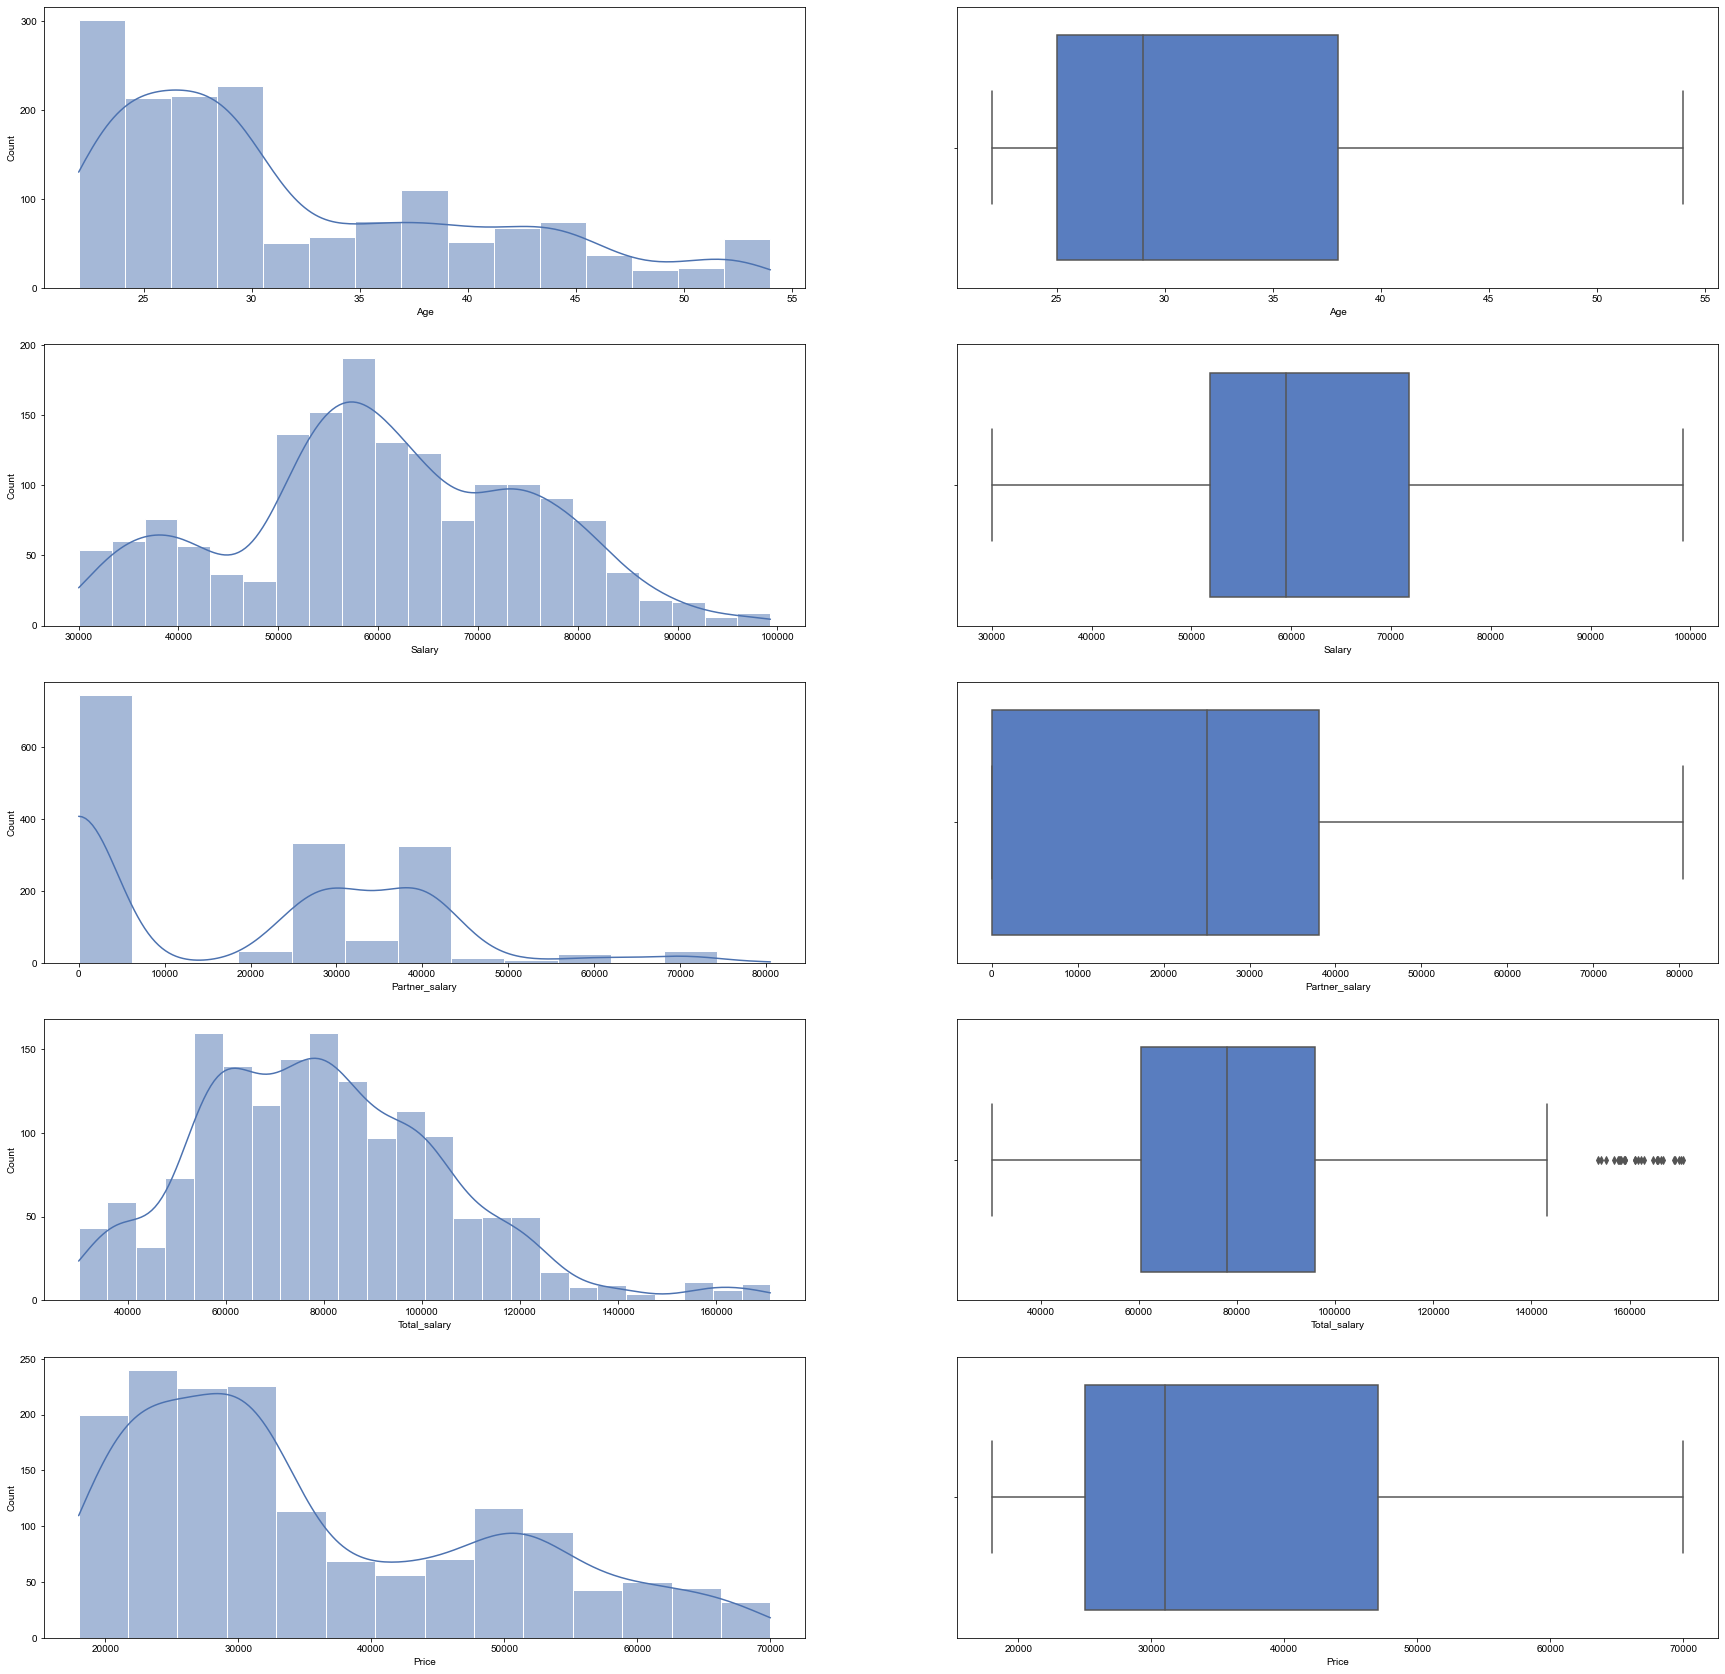

In [27]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(30,30))
sns.set_theme(style="darkgrid", font_scale=2)

sns.histplot(data=df, x='Age', ax=axes[0][0], kde=True, palette='muted');
sns.boxplot(data=df, x='Age',ax=axes[0][1], palette='muted');

sns.histplot(data=df, x='Salary', ax=axes[1][0], kde=True, palette='muted');
sns.boxplot(data=df, x='Salary',ax=axes[1][1], palette='muted');


sns.histplot(data=df, x='Partner_salary', ax=axes[2][0], kde=True, palette='muted');
sns.boxplot(data=df, x='Partner_salary',ax=axes[2][1], palette='muted');


sns.histplot(data=df, x='Total_salary', ax=axes[3][0], kde=True, palette='muted');
sns.boxplot(data=df, x='Total_salary',ax=axes[3][1], palette='muted');


sns.histplot(data=df, x='Price', ax=axes[4][0], kde=True, palette='muted');
sns.boxplot(data=df, x='Price',ax=axes[4][1], palette='muted');

In [28]:
df.skew()

Age               0.893087
Salary           -0.011571
Partner_salary    0.441069
Total_salary      0.609706
Price             0.740874
dtype: float64

In [29]:
num_col=['Age','Salary','Partner_salary','Total_salary','Price']
for i in num_col:
    print(f'Median of {i} is {df[i].median()}')

Median of Age is 29.0
Median of Salary is 59500.0
Median of Partner_salary is 25100.0
Median of Total_salary is 78000.0
Median of Price is 31000.0


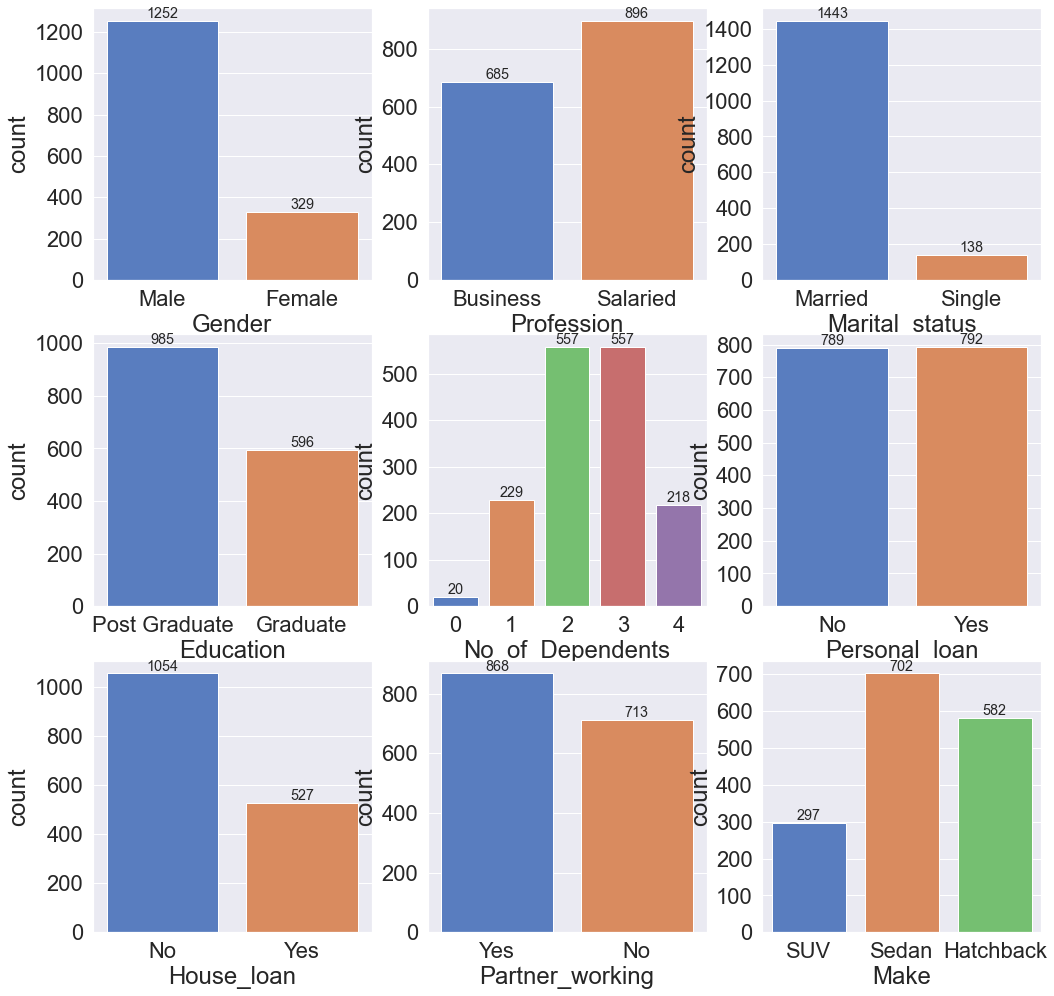

In [30]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(17,17))
sns.set_theme(style="darkgrid", font_scale=1.2)
ax=sns.countplot(data=df, x='Gender', ax=axes[0][0], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(data=df, x='Profession',ax=axes[0][1], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(data=df, x='Marital_status',ax=axes[0][2], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(data=df, x='Education',ax=axes[1][0], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(data=df, x='No_of_Dependents',ax=axes[1][1], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(data=df, x='Personal_loan',ax=axes[1][2], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(data=df, x='House_loan',ax=axes[2][0], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(data=df, x='Partner_working',ax=axes[2][1], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(data=df, x='Make',ax=axes[2][2], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)

In [31]:
cat_list=['Gender', 'Profession','Marital_status','Education','No_of_Dependents','Personal_loan','House_loan','Partner_working','Make']
print("Percentage of values:")
for i in cat_list:
    print(f"\n{i}:\n\n{round(df[i].value_counts(normalize=True)*100,1)}\n")

Percentage of values:

Gender:

Male      79.2
Female    20.8
Name: Gender, dtype: float64


Profession:

Salaried    56.7
Business    43.3
Name: Profession, dtype: float64


Marital_status:

Married    91.3
Single      8.7
Name: Marital_status, dtype: float64


Education:

Post Graduate    62.3
Graduate         37.7
Name: Education, dtype: float64


No_of_Dependents:

2    35.2
3    35.2
1    14.5
4    13.8
0     1.3
Name: No_of_Dependents, dtype: float64


Personal_loan:

Yes    50.1
No     49.9
Name: Personal_loan, dtype: float64


House_loan:

No     66.7
Yes    33.3
Name: House_loan, dtype: float64


Partner_working:

Yes    54.9
No     45.1
Name: Partner_working, dtype: float64


Make:

Sedan        44.4
Hatchback    36.8
SUV          18.8
Name: Make, dtype: float64



# D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

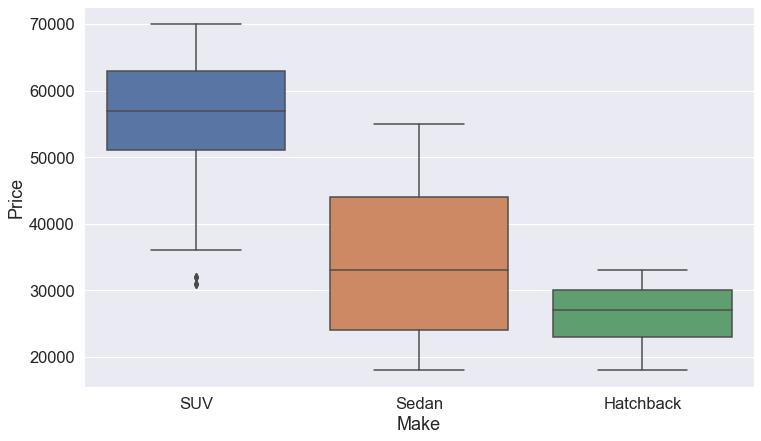

In [32]:
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid", font_scale=1.5)
sns.boxplot(x=df['Make'], y=df['Price']);

<AxesSubplot:xlabel='Age', ylabel='Price'>

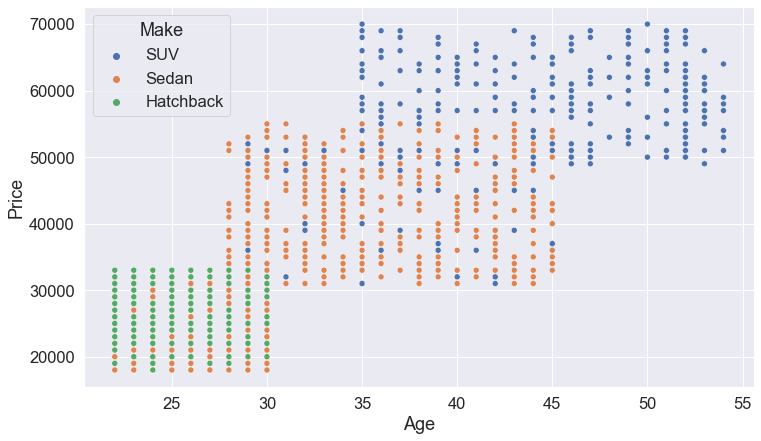

In [33]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df['Age'],y=df['Price'],hue=df['Make'])

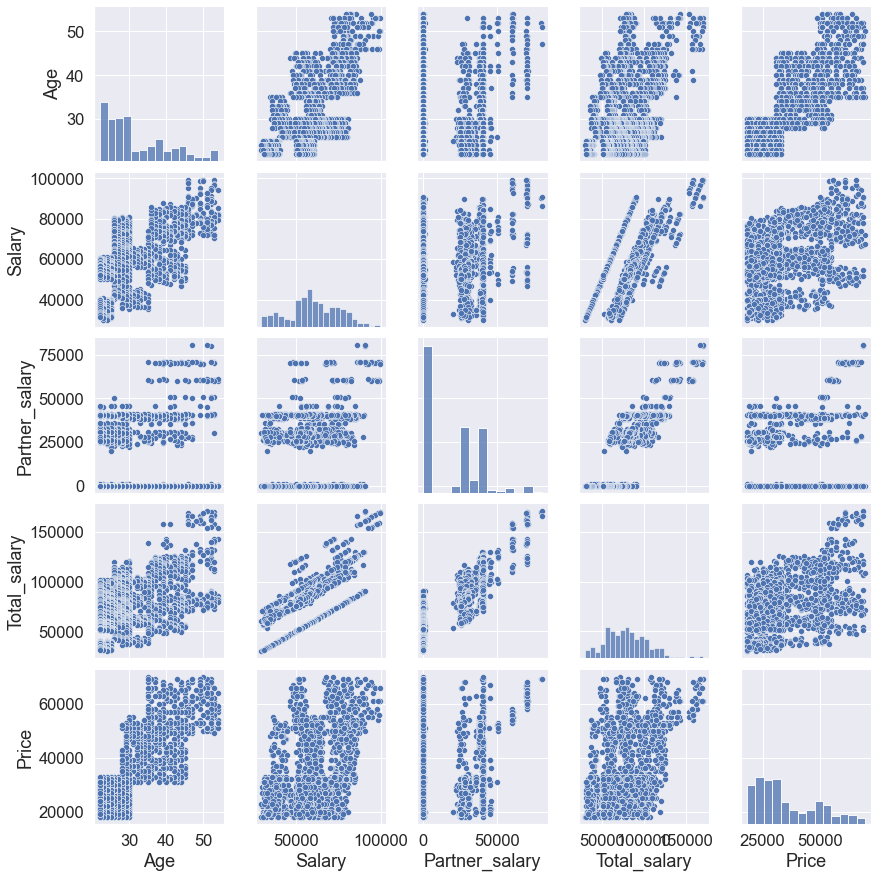

In [34]:
sns.pairplot(data=df)

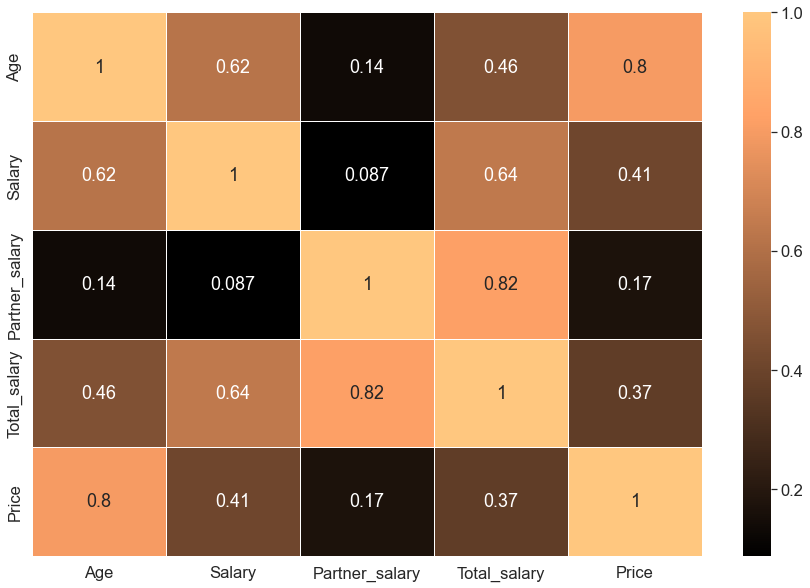

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),annot=True,linewidths=1, cmap='copper');

In [36]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

<AxesSubplot:xlabel='Salary', ylabel='Price'>

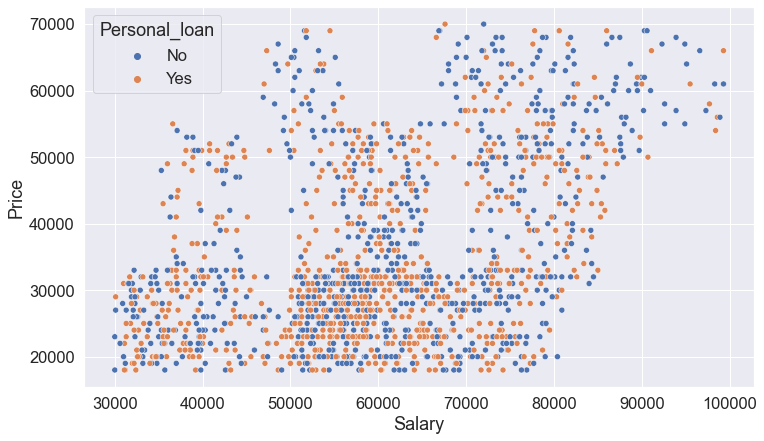

In [37]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df['Salary'],y=df['Price'],hue=df['Personal_loan'])

<AxesSubplot:xlabel='Salary', ylabel='Price'>

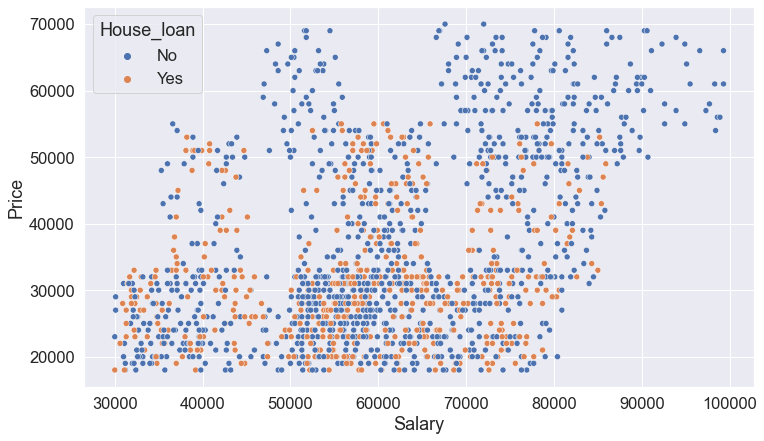

In [38]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df['Salary'],y=df['Price'],hue=df['House_loan'])

In [39]:
cat_list

['Gender',
 'Profession',
 'Marital_status',
 'Education',
 'No_of_Dependents',
 'Personal_loan',
 'House_loan',
 'Partner_working',
 'Make']

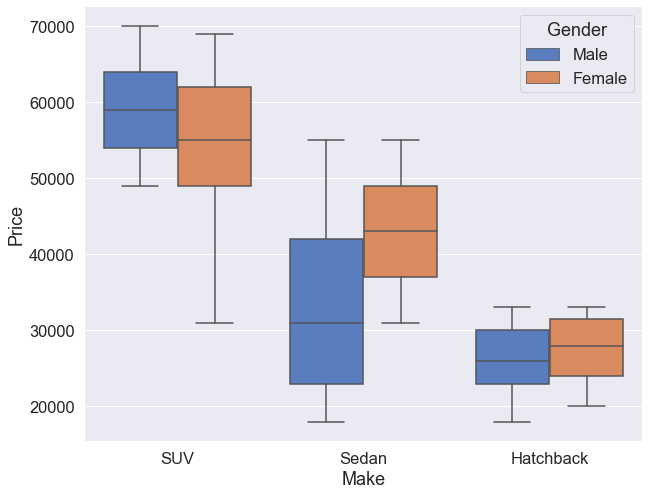

In [40]:
plt.figure(figsize=(10,8))

sns.boxplot(data=df, x='Make',y='Price',hue='Gender', palette='muted');

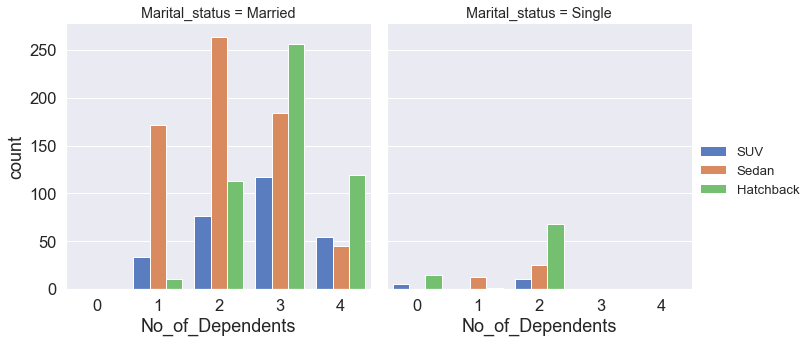

In [41]:

g = sns.FacetGrid(df, col="Marital_status",height=5,aspect=1);
sns.set_theme(style="darkgrid", font_scale=1.2)
g.map(sns.countplot, 'No_of_Dependents', hue=df['Make'], palette='muted');
g.add_legend()

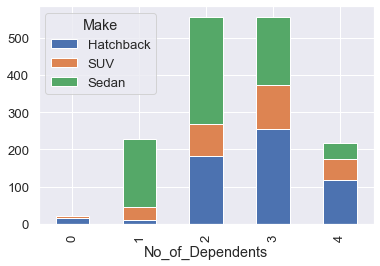

In [42]:
ct1=pd.crosstab(df['No_of_Dependents'],df['Make'])
ct1.plot.bar(stacked=True);


In [43]:
df.columns


Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

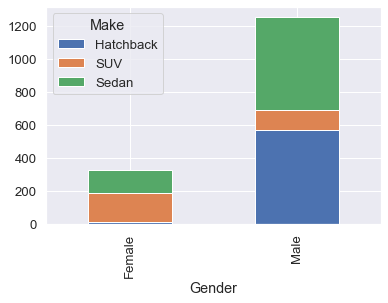

In [44]:
ct2=pd.crosstab(df['Gender'],df['Make'])
ct2.plot.bar(stacked=True);


In [45]:
ct2

Make,Hatchback,SUV,Sedan
Gender,,,
Female,15,173,141
Male,567,124,561


In [46]:
561/1252

0.4480830670926518

In [47]:
141/329

0.42857142857142855

<AxesSubplot:xlabel='Make', ylabel='Age'>

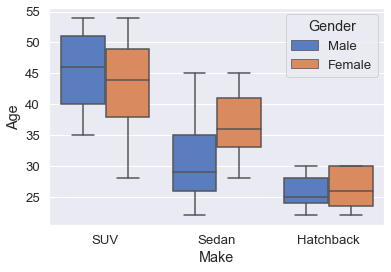

In [48]:
sns.boxplot(data=df,x='Make',y='Age', hue='Gender', palette='muted')

<AxesSubplot:xlabel='No_of_Dependents', ylabel='Price'>

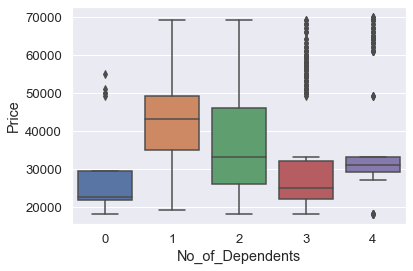

In [49]:
sns.boxplot(data=df, y='Price', x='No_of_Dependents')

## Outlier Treatment.

We saw that outliers were only present in the column 'Total Salary'. We are going to treat them using the boxplot method. 

In [50]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lr,ur=remove_outlier(df['Total_salary'])
print("lower range",lr, "and upper range", ur)


lower range 7400.0 and upper range 149000.0


In [51]:
df['Total_salary']=np.where(df['Total_salary']>ur,ur,df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']<lr,lr,df['Total_salary'])

<AxesSubplot:>

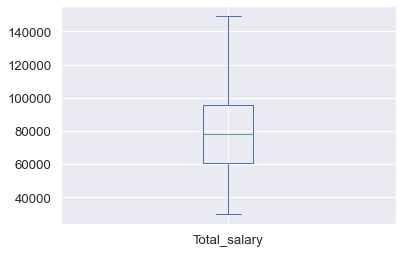

In [52]:
df['Total_salary'].plot.box()

# E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.



# E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

# E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

# E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

In [53]:
#E1 Steve Roger says “Men prefer SUV by a large margin, compared to the women”

ct3=pd.crosstab(df['Gender'],df['Make'])
ct3

#From the table we can see that the number of women buying SUV is more than the number of men buying SUV. 
#Hence Steve Roger is wrong.

Make,Hatchback,SUV,Sedan
Gender,,,
Female,15,173,141
Male,567,124,561


In [54]:
173+124

297

In [55]:
124/297

0.4175084175084175

In [56]:
173/297

0.5824915824915825

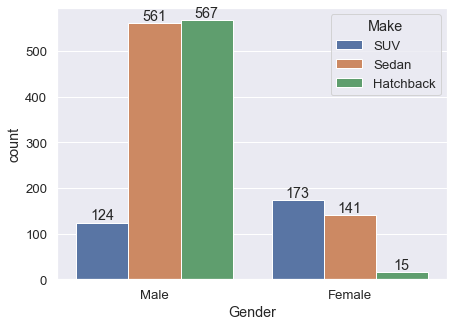

In [57]:
plt.figure(figsize=(7,5))
ax=sns.countplot(data=df,x='Gender', hue='Make');

for i in ax.containers:
    ax.bar_label(i,)

In [58]:
#E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

ct4=pd.crosstab(df['Profession'],df['Make'])
ct4

#292 Salaried people have bought hatch back, 208 have bought SUV and 396 have bought Sedan. 
#hence we can conclude salaried people prefer Sedan. 
#ned stark is correct.

Make,Hatchback,SUV,Sedan
Profession,,,
Business,290,89,306
Salaried,292,208,396


In [59]:
292+208+396

896

In [60]:
292/896

0.32589285714285715

In [61]:
208/896

0.23214285714285715

In [62]:
396/896

0.4419642857142857

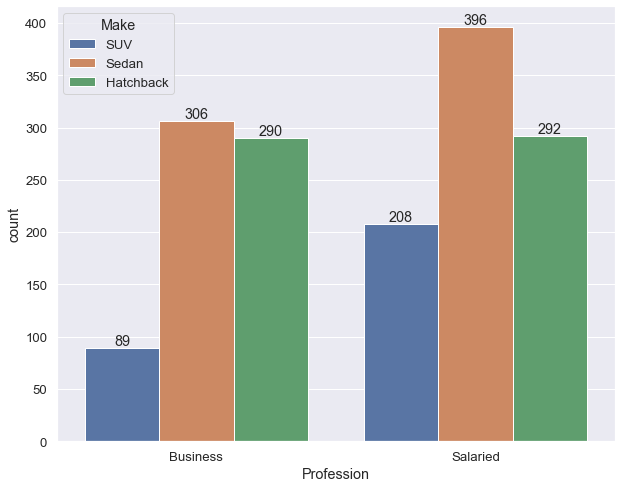

In [63]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid", font_scale=1.2)
ax=sns.countplot(data=df, x='Profession', hue='Make')
for i in ax.containers:
    ax.bar_label(i,)

In [64]:
#E3) Sheldon Cooper; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.
print('Purchases of SALARIED MALES : ')
df[(df['Profession']=='Salaried') & (df['Gender']=='Male')]['Make'].value_counts()

#Sheldon Cooper is wrong. 
#we can see here that Salaried men prefer Sedan more than SUV. so they are more easier target for Sedan sale. 

Purchases of SALARIED MALES : 


Sedan        305
Hatchback    277
SUV           90
Name: Make, dtype: int64

In [65]:
305+277+90 

672

In [66]:
90/672

0.13392857142857142

In [67]:
305/672

0.4538690476190476

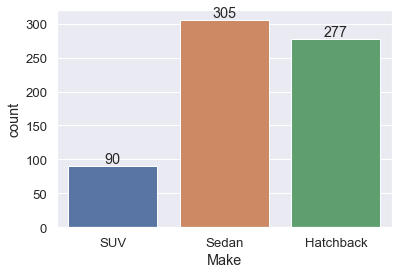

In [68]:
ax=sns.countplot(data=df[(df['Profession']=='Salaried') & (df['Gender']=='Male')], x='Make');
for i in ax.containers:
    ax.bar_label(i,)

# F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

# F1) Gender

# F2) Personal_loan

In [69]:
print("Percentage of men and women buyers")
round(df['Gender'].value_counts(normalize=True)*100,2)

#we see approximately only 21% of the buyers are women. and 79% of the cars are bought by men. 

Percentage of men and women buyers


Male      79.19
Female    20.81
Name: Gender, dtype: float64

In [70]:
df['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

In [71]:
print("Total amount spent : ")
df.groupby('Gender')[['Price']].sum().reset_index()

#Men have spent a total of around $40.5M where as women have spent $15.6M on buying cars. 

Total amount spent : 


,Gender,Price
0,Female,15695000
1,Male,40585000


In [72]:
print("Average amount spent : ")
df.groupby('Gender')[['Price']].mean().reset_index()


Average amount spent : 


,Gender,Price
0,Female,47705.167173
1,Male,32416.134185


In [73]:
# But when we look at the average spending, we see that a woman is spending 47.7k$ on a car where as a man is spending 32.4k$ on a car
# we can say that women are buying more expensive cars than men.

<AxesSubplot:xlabel='Gender', ylabel='Price'>

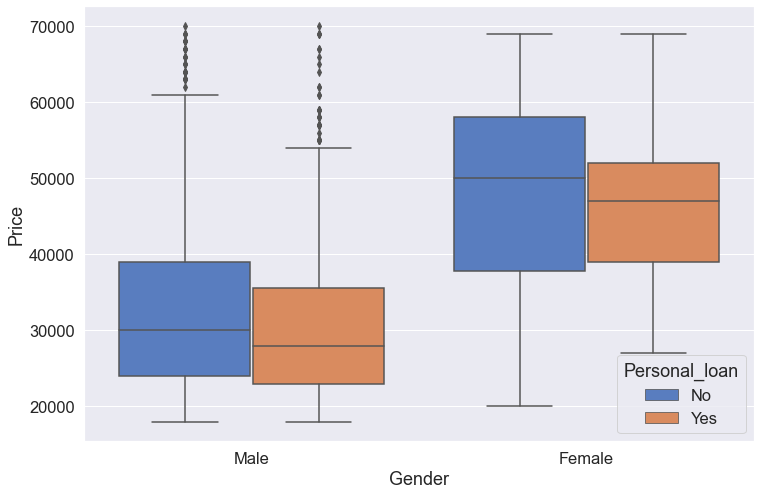

In [74]:
sns.set_theme(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Gender', y='Price', hue='Personal_loan',palette='muted')

<AxesSubplot:xlabel='Gender', ylabel='Price'>

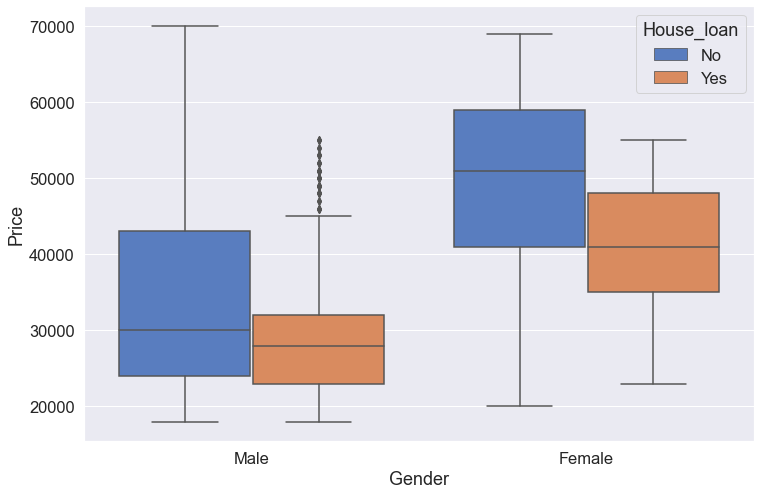

In [75]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Gender', y='Price', hue='House_loan',palette='muted')

### Personal Loan

In [76]:
print("No. of people with and without personal loan")
df['Personal_loan'].value_counts()

#in the given data set, the people who have personal loan and people who have no personal loans are almost same in number. 


No. of people with and without personal loan


Yes    792
No     789
Name: Personal_loan, dtype: int64

In [77]:
print("Total amount spent :")
df.groupby('Personal_loan')[['Price']].sum().reset_index()

Total amount spent :


,Personal_loan,Price
0,No,28990000
1,Yes,27290000


In [78]:
print('Average amount spent :')
df.groupby('Personal_loan')[['Price']].mean().reset_index()

Average amount spent :


,Personal_loan,Price
0,No,36742.712294
1,Yes,34457.070707


In [79]:
36742.712294 - 34457.070707

2285.6415869999983

# G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [80]:
df.groupby('Partner_working')[['Price']].mean()

,Price
Partner_working,
No,36000.000000
Yes,35267.281106


In [81]:
df.groupby('Partner_working')[['Price']].median()

,Price
Partner_working,
No,31000.0
Yes,31000.0


<AxesSubplot:xlabel='Partner_working', ylabel='Price'>

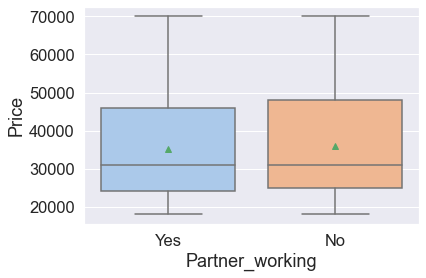

In [82]:
sns.boxplot(data=df, x='Partner_working', y='Price',showmeans=True, palette='pastel')

Working partner doesnt ensure higher priced cars


# H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [83]:
ct5=pd.crosstab(df['Gender'],df['Marital_status'])
ct5

Marital_status,Married,Single
Gender,,
Female,307,22
Male,1136,116


<AxesSubplot:xlabel='Gender'>

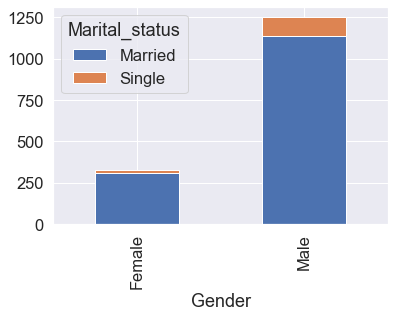

In [84]:
ct5.plot.bar(stacked=True)

<AxesSubplot:xlabel='Gender', ylabel='Price'>

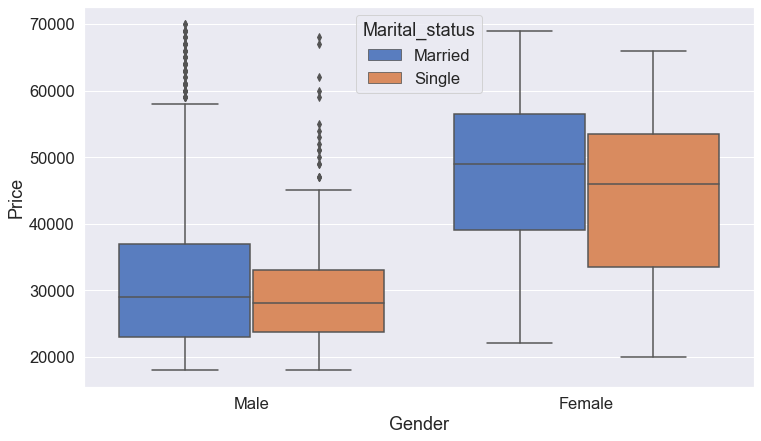

In [85]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df,x='Gender',y='Price',hue='Marital_status',palette='muted')

In [86]:
df.groupby(['Gender','Marital_status'])[['Price']].mean().reset_index()

,Gender,Marital_status,Price
0,Female,Married,47918.566775
1,Female,Single,44727.272727
2,Male,Married,32525.528169
3,Male,Single,31344.827586


In [87]:
df.groupby(['Gender','Marital_status'])[['Price']].sum().reset_index()

,Gender,Marital_status,Price
0,Female,Married,14711000
1,Female,Single,984000
2,Male,Married,36949000
3,Male,Single,3636000


In [88]:
pd.crosstab(df['Gender'],df['Marital_status'])

Marital_status,Married,Single
Gender,,
Female,307,22
Male,1136,116


In [89]:
h1=pd.crosstab([df['Gender'],df['Marital_status']],df['Make'],margins=True)
h1

Make                   Hatchback  SUV  Sedan   All
Gender Marital_status                             
Female Married                14  166    127   307
       Single                  1    7     14    22
Male   Married               484  115    537  1136
       Single                 83    9     24   116
All                          582  297    702  1581

In [90]:
h2=pd.crosstab([df['Gender'],df['Marital_status']],df['Make'])


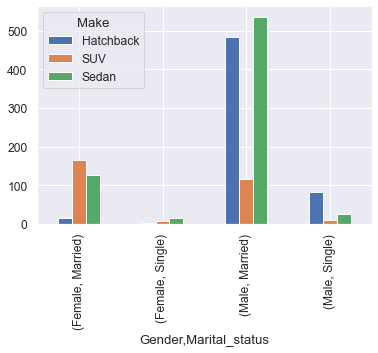

In [91]:
#important -write report along these lines.text
sns.set_theme(style="darkgrid", font_scale=1.1)
h2.plot.bar();

<AxesSubplot:xlabel='Gender', ylabel='Price'>

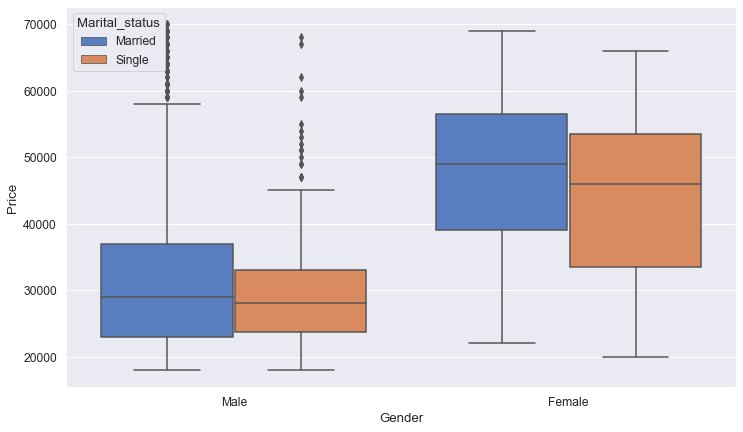

In [92]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='Gender', y='Price', hue='Marital_status',palette='muted')

# Problem 2

# ***Framing An Analytics Problem*** 

A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out.

GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.

GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)

## Problem 2 Question: ( Analyze the dataset and list down the top 5 important variables, along with the business justifications. (10 Points) Data Dictionary - Link )

In [93]:
pd.set_option('display.max_columns', 50)


In [94]:
cc=pd.read_excel('godigt_cc_data.xlsx')

In [95]:
cc.shape

(8448, 28)

In [96]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [97]:
cc.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,hotlist_flag,widget_products,engagement_products,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,0,0,0,N,1,3,1552111,Y,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,0,0,0,N,4,1,4833871,Y,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,0,0,0,N,4,2,1345429,N,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,1,1,1,N,6,0,880560,N,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,0,1,1,N,4,3,1808582,N,21,1,0,0,0,0,T,38108,Salaried,220000


In [98]:
cc.tail()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,hotlist_flag,widget_products,engagement_products,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,0,0,0,N,1,0,3617288,N,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,0,1,1,N,7,4,3661676,N,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,0,0,0,N,3,0,1274059,Y,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,0,0,0,N,3,0,1271148,N,54,1,0,0,0,0,T,57100,Salaried,210000
8447,8448,4262 41XX XXXX XXXX,426241,Visa,rewards,2013-01-13,D,0,1,1,0,0,0,N,1,1,1329756,Y,37,0,0,0,0,0,T,45244,Retired,130000


Dropping unhelpful columns

In [99]:
cc.drop('userid', axis=1,inplace=True)
cc.drop('card_no', axis=1,inplace=True)
cc.drop('card_bin_no', axis=1,inplace=True)

Changing the data type of few columns from int to category

In [100]:
cc.columns

Index(['Issuer', 'card_type', 'card_source_date', 'high_networth', 'active_30',
       'active_60', 'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

In [101]:
cc['hotlist_flag'].unique()

array(['N', 'Y'], dtype=object)

In [102]:
cc['other_bank_cc_holding'].unique()

array(['Y', 'N'], dtype=object)

In [103]:
dtchange=['active_30',
       'active_60', 'active_90', 'cc_active30', 'cc_active60', 'cc_active90','T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity','widget_products','engagement_products']

for col in dtchange:
    cc[col]=cc[col].astype('category')

In [104]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Issuer                   8448 non-null   object        
 1   card_type                8448 non-null   object        
 2   card_source_date         8448 non-null   datetime64[ns]
 3   high_networth            8448 non-null   object        
 4   active_30                8448 non-null   category      
 5   active_60                8448 non-null   category      
 6   active_90                8448 non-null   category      
 7   cc_active30              8448 non-null   category      
 8   cc_active60              8448 non-null   category      
 9   cc_active90              8448 non-null   category      
 10  hotlist_flag             8448 non-null   object        
 11  widget_products          8448 non-null   category      
 12  engagement_products      8448 non-

Checking for duplicates

In [105]:
cc.duplicated().sum()

0

Checking for null values

In [106]:
cc.isnull().sum()

Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

38 missing values in Transactor and revolver.

Replacing the missing values with mode

In [107]:
cc['Transactor_revolver'].replace(np.nan, cc['Transactor_revolver'].mode()[0], inplace=True)

In [108]:
cc.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Issuer,8448,3,Visa,7279,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_type,8448,15,rewards,1502,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_source_date,8448,5186,2008-12-04 00:00:00,6,1998-07-24,2020-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
high_networth,8448,5,A,1740,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_30,8448.0,2.0,0.0,5978.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_60,8448.0,2.0,0.0,4268.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_90,8448.0,2.0,1.0,5424.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_active30,8448.0,2.0,0.0,6048.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_active60,8448.0,2.0,0.0,4355.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_active90,8448.0,2.0,1.0,5342.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
cc[cc['cc_limit']==0]

,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,hotlist_flag,widget_products,engagement_products,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
7620,Visa,chartered,2011-06-24,A,0,0,0,1,1,1,Y,1,0,1822401,Y,38,0,0,0,0,0,T,0,Self Employed,0


In [110]:
cc[cc['avg_spends_l3m']==0]

,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,hotlist_flag,widget_products,engagement_products,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
528,Visa,chartered,2004-10-04,A,0,0,0,0,1,1,Y,1,0,3175386,Y,49,0,0,0,0,0,T,0,Self Employed,500000
919,Visa,shoprite,2014-01-15,D,1,1,1,1,1,1,Y,2,0,962973,Y,53,0,0,0,0,0,T,0,Salaried,150000
973,Visa,rewards,2009-08-19,E,0,1,1,0,0,0,Y,0,1,755848,Y,41,0,0,0,0,0,T,0,Retired,90000
1173,Visa,edge,2004-09-22,A,0,1,1,1,1,1,Y,2,1,2597909,N,52,0,0,0,0,0,T,0,Self Employed,340000
1255,Visa,prosperity,2014-08-31,B,0,0,0,1,1,1,Y,0,1,1776858,Y,30,0,0,0,0,0,T,0,Retired,430000
1388,Visa,chartered,2000-08-15,A,0,0,0,0,0,0,Y,2,1,2481012,N,29,0,0,0,0,0,T,0,Retired,380000
1444,Visa,aura,2013-06-02,E,0,0,0,0,1,1,Y,2,1,889175,N,40,0,0,0,0,0,T,0,Retired,90000
1911,Amex,smartearn,2014-09-26,C,0,0,0,0,1,1,Y,1,0,1437726,Y,23,0,0,0,0,0,T,0,Retired,120000
2058,Mastercard,smartearn,2005-08-24,E,0,1,1,0,0,1,Y,2,0,345544,N,16,0,0,0,0,0,T,0,Salaried,90000
2287,Visa,prosperity,2015-01-05,A,1,1,1,0,0,1,Y,1,1,3195975,N,45,0,0,0,0,0,T,0,0,690000


### Checking for bad data

In [111]:
cc.columns

Index(['Issuer', 'card_type', 'card_source_date', 'high_networth', 'active_30',
       'active_60', 'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

In [112]:
ls=['Issuer','card_type', 'high_networth','widget_products', 'engagement_products','Occupation_at_source']

In [113]:
for col in ls:
    print(cc[col].value_counts(),'\n\n')

Visa          7279
Mastercard     728
Amex           441
Name: Issuer, dtype: int64 


rewards       1502
prosperity    1007
edge           980
chartered      923
smartearn      765
shoprite       688
indianoil      680
cashback       676
aura           652
gold           145
prime          112
pulse          101
elite           96
centurion       62
platinum        59
Name: card_type, dtype: int64 


A    1740
D    1696
E    1693
B    1660
C    1659
Name: high_networth, dtype: int64 


7    1132
4    1117
5    1115
6    1062
3    1060
2    1010
1     997
0     955
Name: widget_products, dtype: int64 


4    1010
3     966
1     950
8     949
5     940
0     939
6     926
7     889
2     879
Name: engagement_products, dtype: int64 


Salaried         3918
Self Employed    2175
Retired          1089
Student           621
Housewife         384
0                 261
Name: Occupation_at_source, dtype: int64 




There is bad data in the column 'Occupation at source' 

In [114]:
cc['Occupation_at_source'].replace(0,cc['Occupation_at_source'].mode()[0], inplace=True)

In [115]:
cc['Occupation_at_source'].unique()

array(['Self Employed', 'Salaried', 'Student', 'Retired', 'Housewife'],
      dtype=object)

In [116]:
cc.columns


Index(['Issuer', 'card_type', 'card_source_date', 'high_networth', 'active_30',
       'active_60', 'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

# a

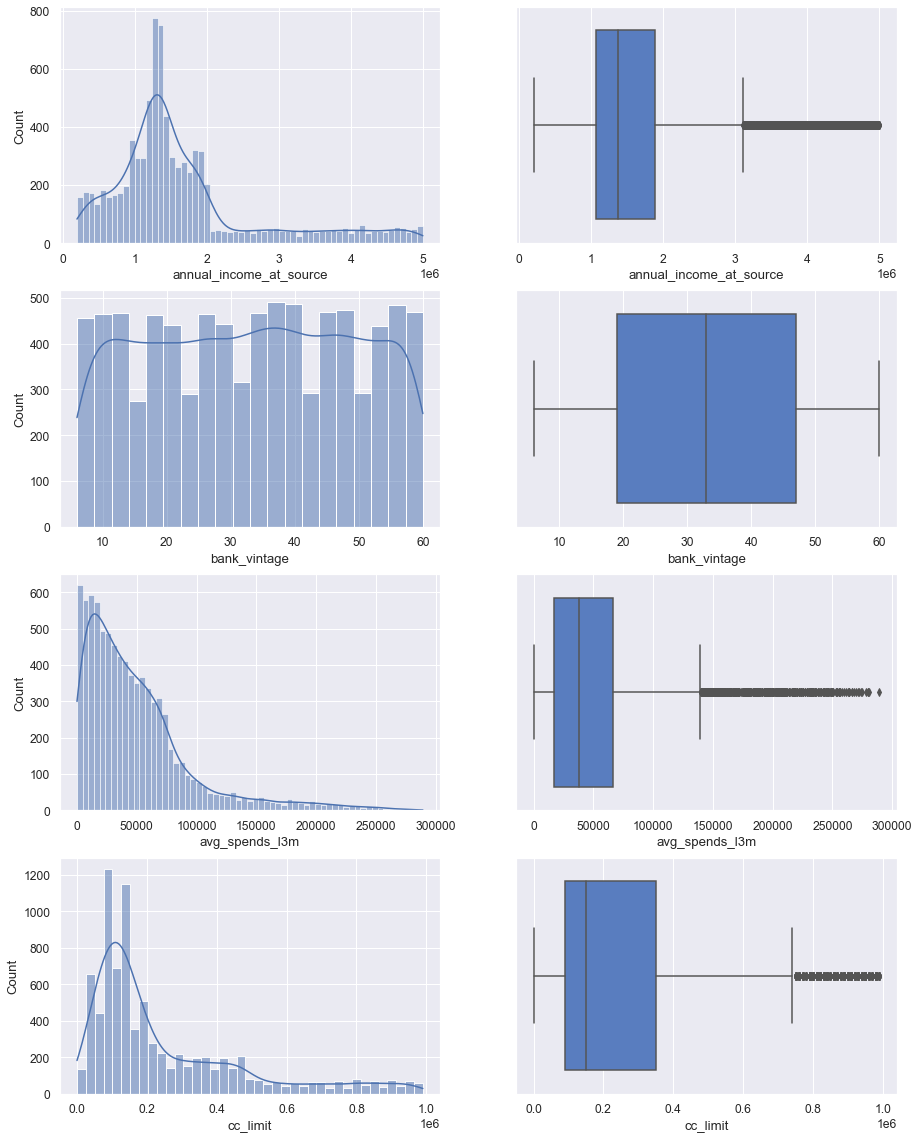

In [117]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(15,20))
sns.set_theme(style="whitegrid", font_scale=1.2)

sns.histplot(data=cc, x='annual_income_at_source', ax=axes[0][0], kde=True, palette='muted');
sns.boxplot(data=cc, x='annual_income_at_source',ax=axes[0][1], palette='muted');


sns.histplot(data=cc, x='bank_vintage', ax=axes[1][0], kde=True, palette='muted');
sns.boxplot(data=cc, x='bank_vintage',ax=axes[1][1], palette='muted');


sns.histplot(data=cc, x='avg_spends_l3m', ax=axes[2][0], kde=True, palette='muted');
sns.boxplot(data=cc, x='avg_spends_l3m',ax=axes[2][1], palette='muted');


sns.histplot(data=cc, x='cc_limit', ax=axes[3][0], kde=True, palette='muted');
sns.boxplot(data=cc, x='cc_limit',ax=axes[3][1], palette='muted');


In [118]:
cc.skew()

annual_income_at_source    1.447200
bank_vintage              -0.016887
avg_spends_l3m             1.888792
cc_limit                   1.512331
dtype: float64

# B

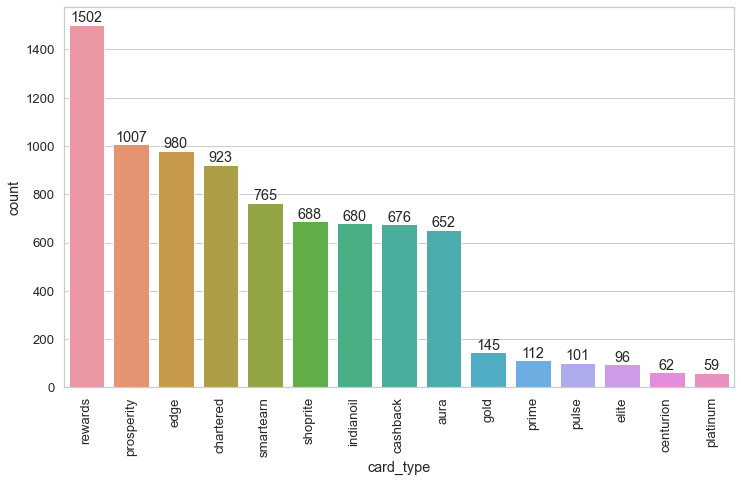

In [119]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
ax=sns.countplot(data=cc, x='card_type',order=cc['card_type'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i,)

In [120]:
pd.crosstab(cc['card_type'],cc['high_networth'])

high_networth,A,B,C,D,E
card_type,,,,,
aura,0,0,218,214,220
cashback,0,0,201,255,220
centurion,33,29,0,0,0
chartered,488,435,0,0,0
edge,514,466,0,0,0
elite,48,48,0,0,0
gold,29,32,26,34,24
indianoil,0,0,225,221,234
platinum,27,32,0,0,0


In [121]:
cc['avg_spends_l3m'].describe()

count      8448.000000
mean      49527.365530
std       46244.954836
min           0.000000
25%       17110.000000
50%       37943.000000
75%       66095.750000
max      289292.000000
Name: avg_spends_l3m, dtype: float64

In [122]:
cc.groupby('card_type')[['avg_spends_l3m']].mean().sort_values(by='avg_spends_l3m', ascending=False).reset_index()

,card_type,avg_spends_l3m
0,centurion,82440.564516
1,prime,80403.357143
2,edge,78981.873469
3,chartered,77330.923077
4,elite,76668.229167
5,prosperity,75789.428004
6,platinum,73599.711864
7,pulse,69031.188119
8,gold,46164.641379
9,indianoil,32356.322059


<AxesSubplot:xlabel='card_type'>

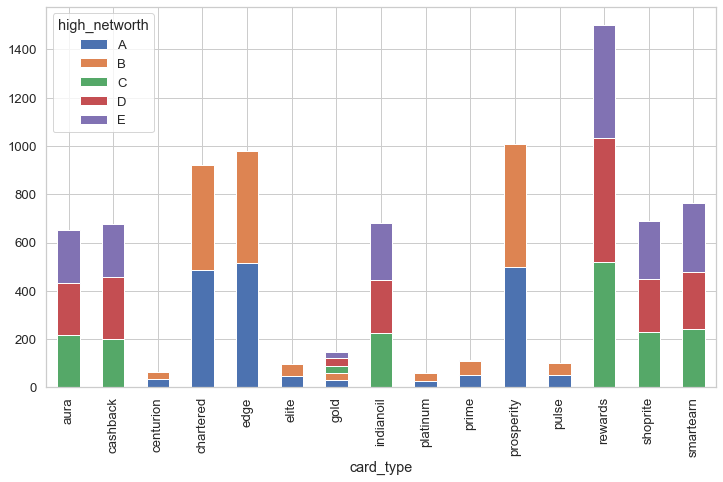

In [123]:
pd.crosstab(cc['card_type'], cc['high_networth']).plot.bar(figsize=(12,7),stacked=True)

# c

<AxesSubplot:xlabel='high_networth', ylabel='avg_spends_l3m'>

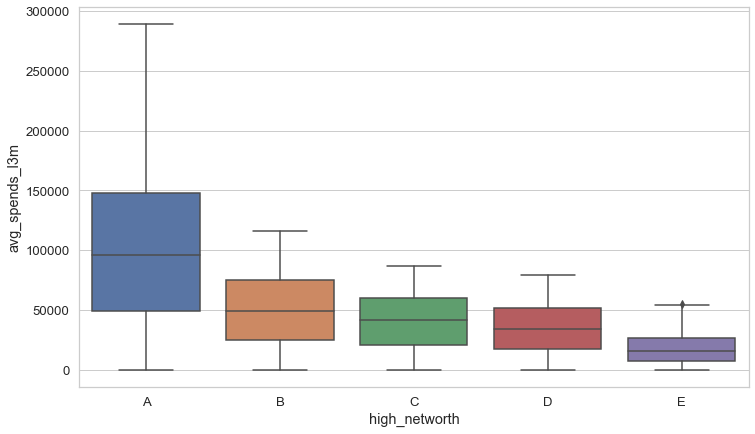

In [124]:
plt.figure(figsize=(12,7))
sns.boxplot(cc['high_networth'], cc['avg_spends_l3m'], order=['A','B','C','D','E'])

<AxesSubplot:xlabel='high_networth', ylabel='avg_spends_l3m'>

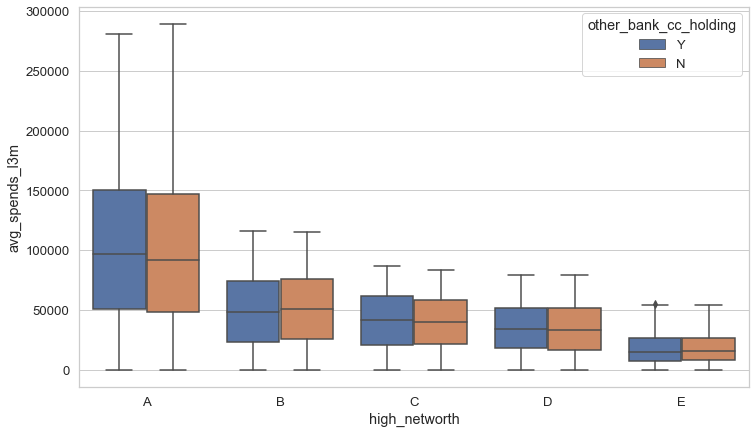

In [125]:
plt.figure(figsize=(12,7))
sns.boxplot(cc['high_networth'], cc['avg_spends_l3m'], order=['A','B','C','D','E'], hue=cc['other_bank_cc_holding'])

# D

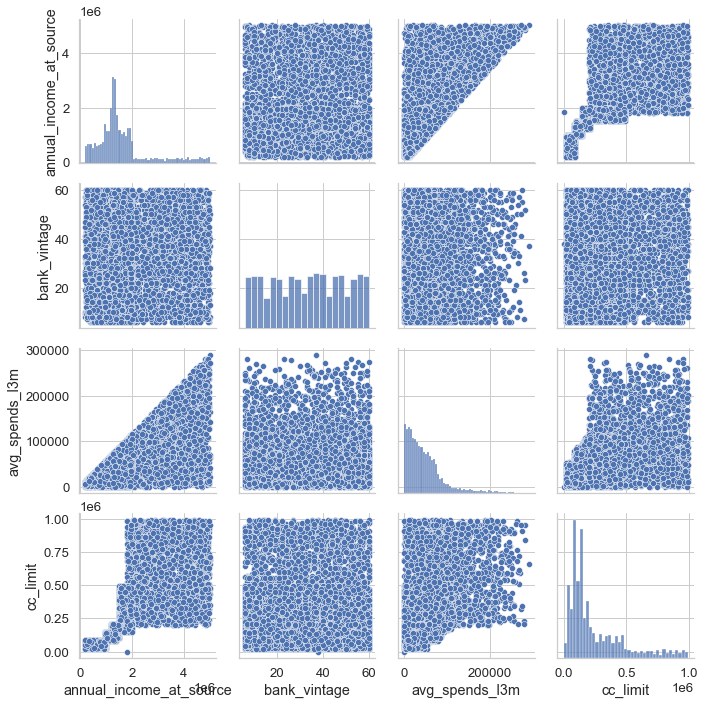

In [126]:
sns.pairplot(cc)

<AxesSubplot:>

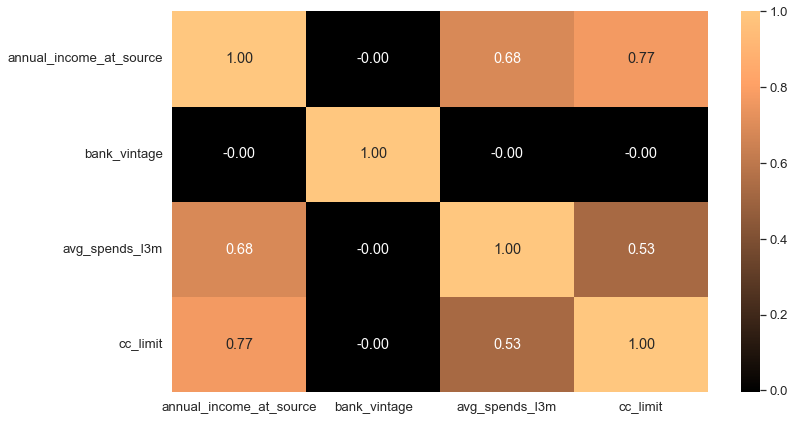

In [127]:

plt.figure(figsize=(12,7))
sns.heatmap(cc.corr(),annot=True,fmt='.2f',cmap='copper')

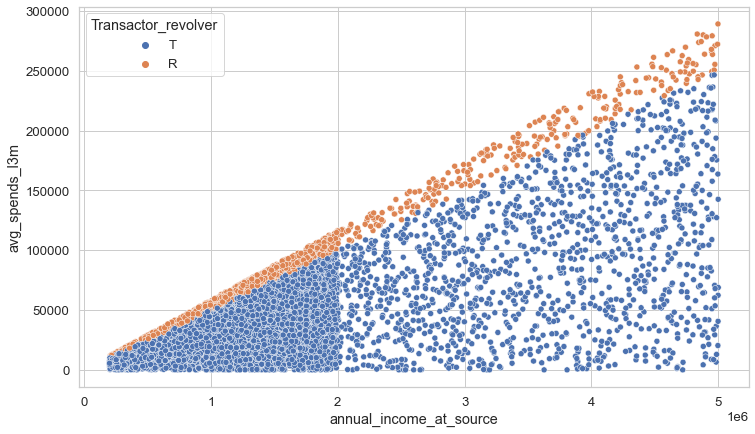

In [128]:
plt.figure(figsize=(12,7))
sns.scatterplot( cc['annual_income_at_source'],cc['avg_spends_l3m'],hue=cc['Transactor_revolver']);

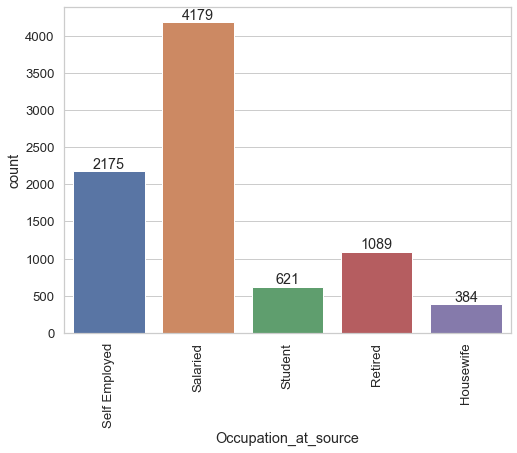

In [129]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)

ax=sns.countplot(x=cc['Occupation_at_source'])
for i in ax.containers:
    ax.bar_label(i,)

<AxesSubplot:xlabel='Occupation_at_source', ylabel='avg_spends_l3m'>

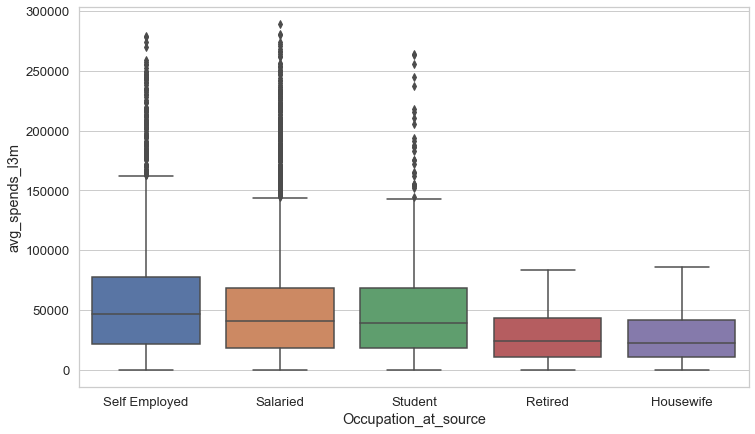

In [130]:
plt.figure(figsize=(12,7))
sns.boxplot(cc['Occupation_at_source'], cc['avg_spends_l3m'])

In [131]:
cc.groupby('Occupation_at_source')[['avg_spends_l3m']].mean().sort_values(by='avg_spends_l3m', ascending=False).reset_index()

,Occupation_at_source,avg_spends_l3m
0,Self Employed,58797.316322
1,Salaried,52211.122039
2,Student,49409.251208
3,Retired,28574.860422
4,Housewife,27425.973958


In [132]:
cc.columns

Index(['Issuer', 'card_type', 'card_source_date', 'high_networth', 'active_30',
       'active_60', 'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

In [133]:
cc[cc['Occupation_at_source']=='Student']['annual_income_at_source'].min()

202558

In [134]:
cc[cc['Occupation_at_source']=='Student']['annual_income_at_source'].mean()

1725056.6376811594

In [135]:
cc[cc['Occupation_at_source']=='Student']['annual_income_at_source'].max()

4972828

In [136]:
cc[(cc['Occupation_at_source']=='Student') & (cc['annual_income_at_source']>1000000)]

,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,hotlist_flag,widget_products,engagement_products,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
2,Visa,rewards,2013-10-05,C,0,0,0,0,0,0,N,4,2,1345429,N,23,1,0,0,0,0,R,70587,Student,210000
16,Visa,prosperity,2011-03-22,B,0,0,0,0,0,0,N,1,7,1737217,Y,28,0,0,0,0,0,R,89121,Student,170000
43,Visa,shoprite,2016-05-11,C,0,0,0,0,1,1,N,4,7,1296636,Y,9,0,0,0,0,0,T,23981,Student,190000
81,Visa,rewards,2000-04-29,C,0,0,0,0,0,0,N,5,7,1456663,Y,36,0,0,0,0,0,T,70183,Student,120000
104,Visa,indianoil,2019-03-11,C,0,0,0,0,1,1,N,0,6,1488619,Y,15,0,0,0,0,0,T,70177,Student,150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,Visa,prosperity,2015-03-12,B,0,0,0,0,0,0,N,5,4,1558727,Y,45,0,0,0,0,0,T,17291,Student,410000
8360,Visa,edge,2007-05-29,B,0,0,0,0,1,1,N,2,1,1561527,N,43,0,0,0,0,0,T,643,Student,260000
8365,Visa,prosperity,2005-08-09,B,0,0,0,0,1,1,N,6,6,1962736,Y,53,0,0,0,0,0,T,81981,Student,270000
8376,Visa,chartered,2004-02-04,B,0,0,0,0,1,1,N,7,5,1706123,Y,32,0,0,0,0,0,T,55003,Student,150000


<AxesSubplot:xlabel='widget_products', ylabel='avg_spends_l3m'>

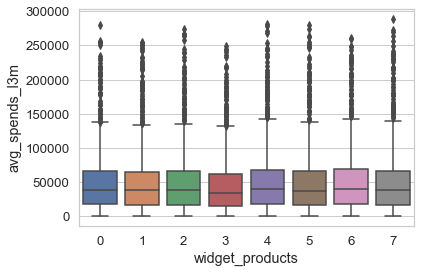

In [137]:
sns.boxplot(cc['widget_products'],cc['avg_spends_l3m'])

<AxesSubplot:xlabel='engagement_products', ylabel='avg_spends_l3m'>

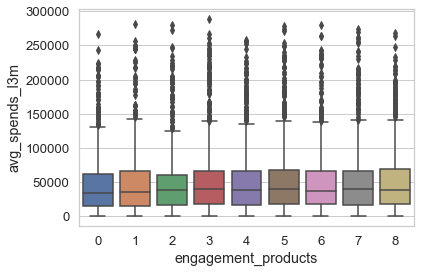

In [138]:
sns.boxplot(cc['engagement_products'],cc['avg_spends_l3m'])

In [139]:
cc['avg_spends_l3m'].describe()

count      8448.000000
mean      49527.365530
std       46244.954836
min           0.000000
25%       17110.000000
50%       37943.000000
75%       66095.750000
max      289292.000000
Name: avg_spends_l3m, dtype: float64

In [140]:
cc.columns

Index(['Issuer', 'card_type', 'card_source_date', 'high_networth', 'active_30',
       'active_60', 'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')

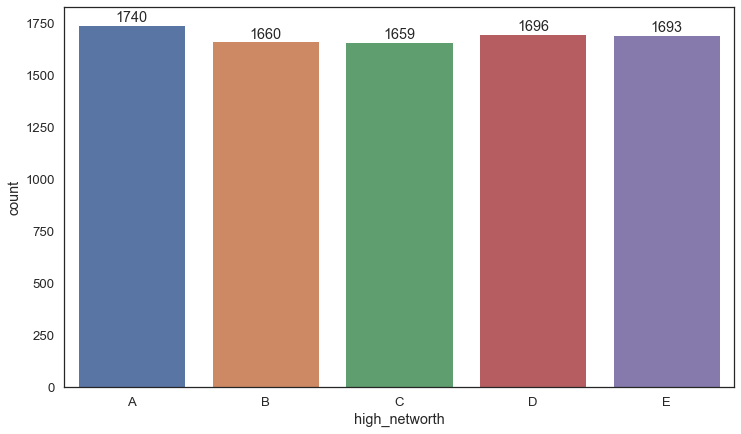

In [141]:
plt.figure(figsize=(12,7))
sns.set_theme(style='white',font_scale=1.2)
ax=sns.countplot(data=cc, x='high_networth',order=['A','B','C','D','E'])
for i in ax.containers:
    ax.bar_label(i,)

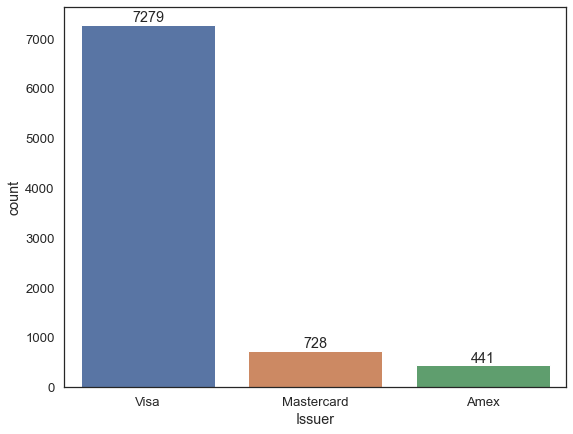

In [142]:
plt.figure(figsize=(9,7))
sns.set_theme(style='white',font_scale=1.2)
ax=sns.countplot(data=cc, x='Issuer')
for i in ax.containers:
    ax.bar_label(i,)

Salaried people are more likely to show higher intent towards a credit cards

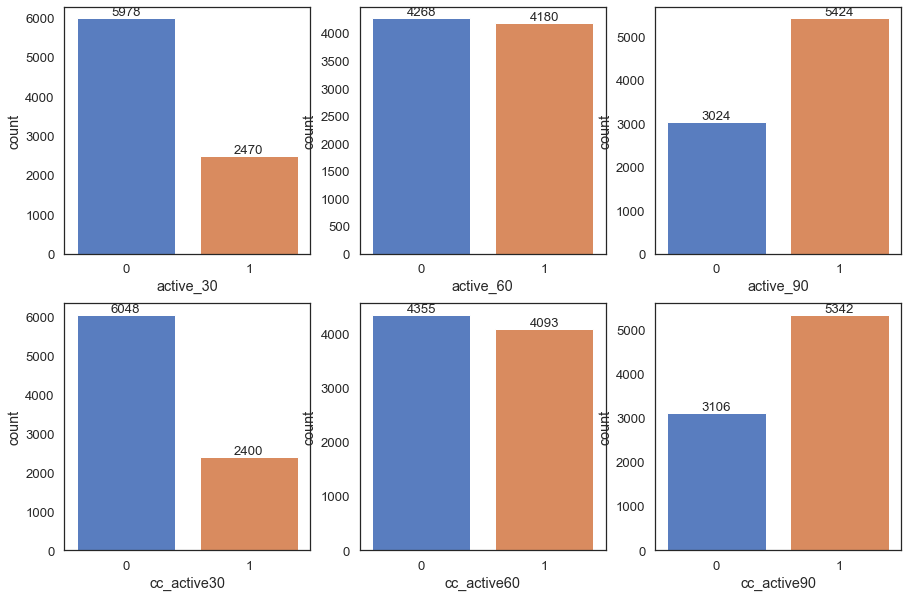

In [143]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
sns.set_theme(style='white',font_scale=1.1)

ax=sns.countplot(x=cc['active_30'], ax=axes[0][0], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(x=cc['active_60'],ax=axes[0][1], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot( x=cc['active_90'],ax=axes[0][2], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(x=cc['cc_active30'],ax=axes[1][0], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(x=cc['cc_active60'],ax=axes[1][1], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
   
ax=sns.countplot(x=cc['cc_active90'],ax=axes[1][2], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)

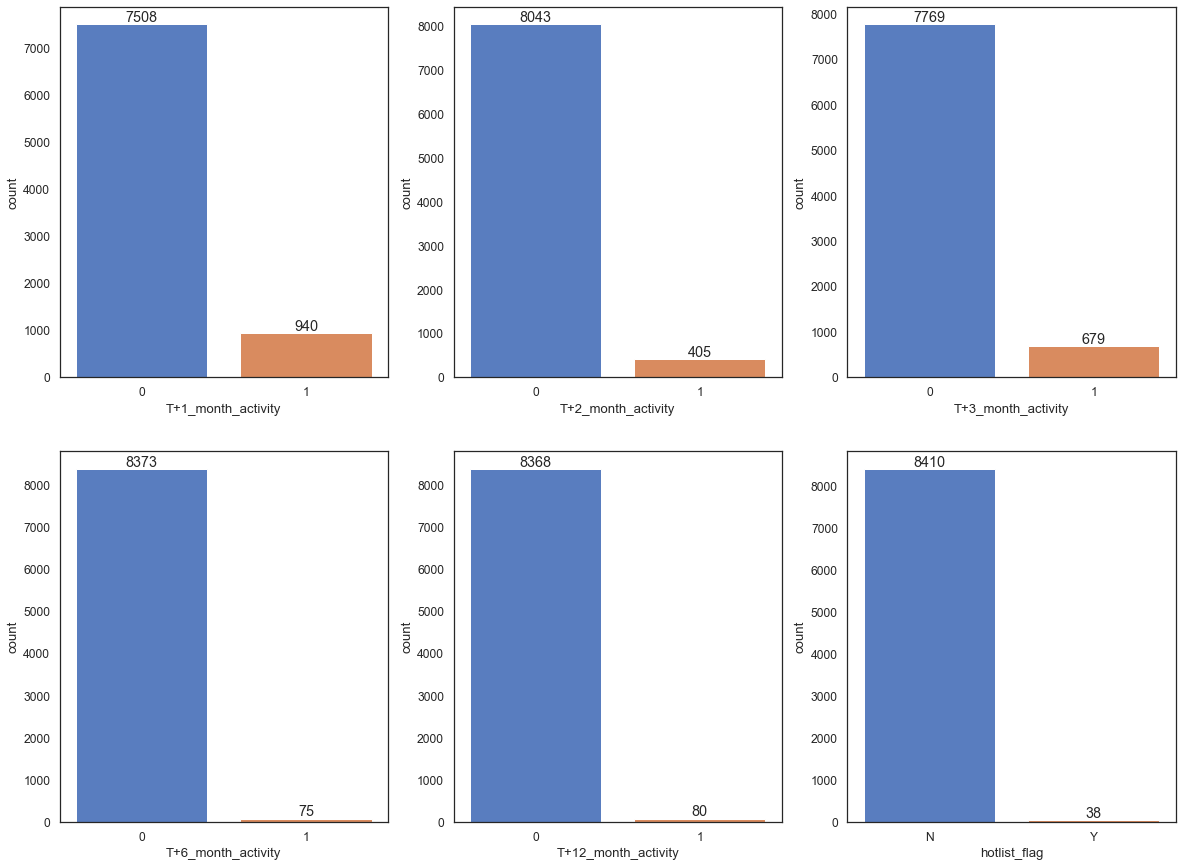

In [144]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,15))
sns.set_theme(style='white',font_scale=1.2)

ax=sns.countplot(x=cc['T+1_month_activity'], ax=axes[0][0], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(x=cc['T+2_month_activity'],ax=axes[0][1], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot( x=cc['T+3_month_activity'],ax=axes[0][2], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(x=cc['T+6_month_activity'],ax=axes[1][0], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(x=cc['T+12_month_activity'],ax=axes[1][1], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(x=cc['hotlist_flag'],ax=axes[1][2], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
   

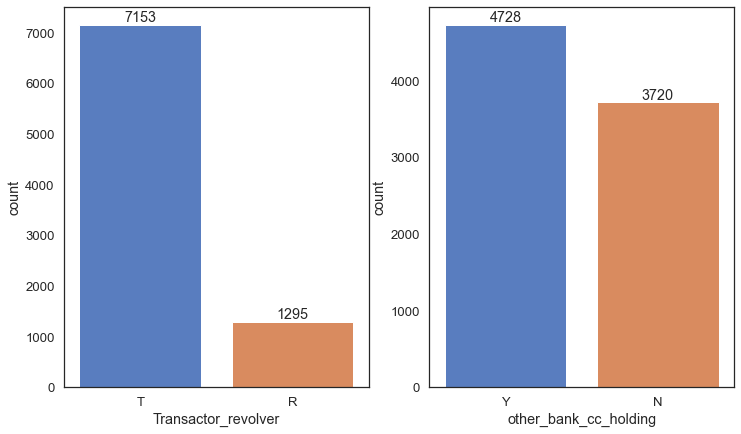

In [145]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,7))

ax=sns.countplot(x=cc['Transactor_revolver'], ax=axes[0], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(x=cc['other_bank_cc_holding'],ax=axes[1], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)

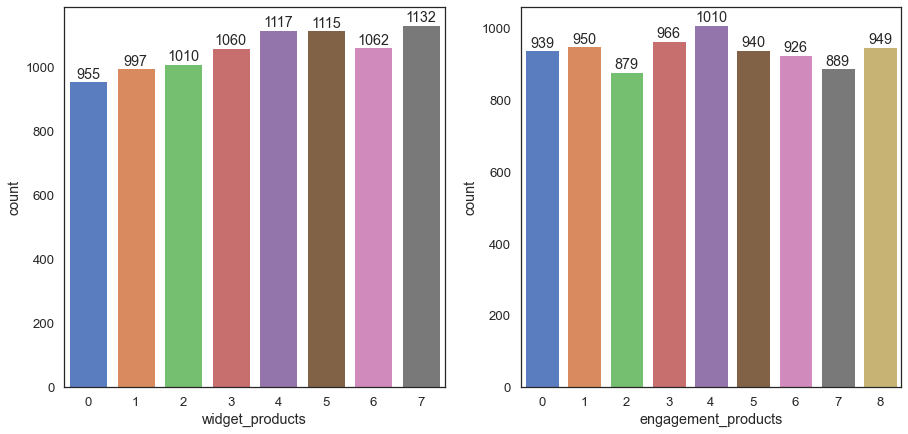

In [146]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,7))

ax=sns.countplot(x=cc['widget_products'], ax=axes[0], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)
    
ax=sns.countplot(x=cc['engagement_products'],ax=axes[1], palette='muted');
for i in ax.containers:
    ax.bar_label(i,)

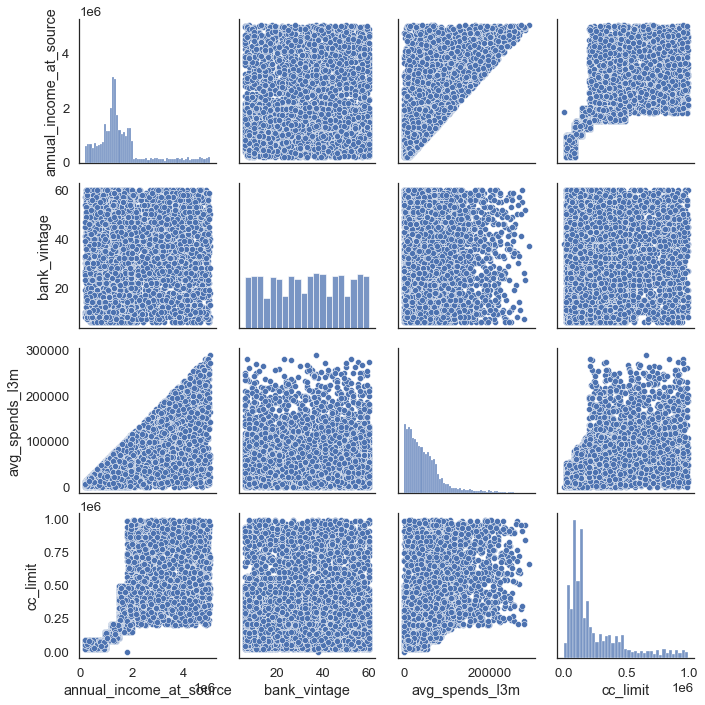

In [147]:
sns.pairplot(cc);

Only relationship we can see here is 

Avg 3 month spend v/s annual income -  we can see nobosy is spending carelessly. 

cc limit v/s annual income.

cc limit v/s Avg spend also looks clouded. 

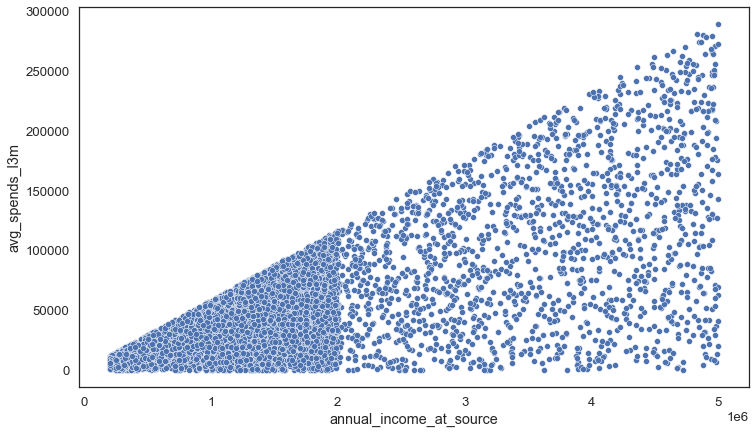

In [148]:
plt.figure(figsize=(12,7))
sns.scatterplot(y=cc['avg_spends_l3m'], x=cc['annual_income_at_source']);

People whose income is less than 2 lakhs are using credit cards more

<AxesSubplot:>

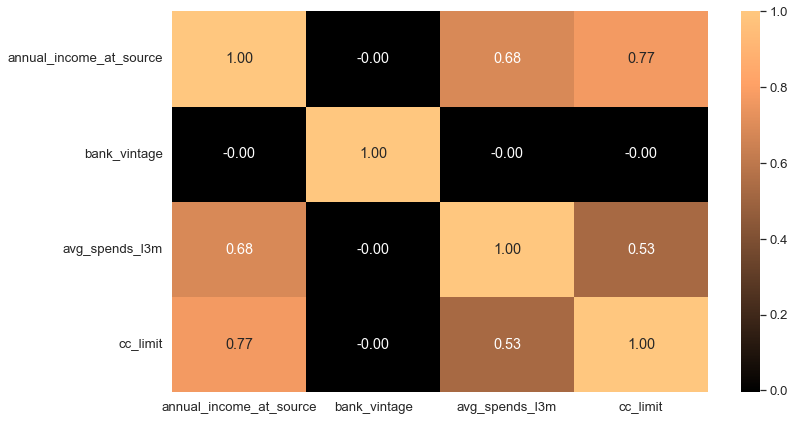

In [149]:
plt.figure(figsize=(12,7))
sns.heatmap(cc.corr(),annot=True,fmt='.2f',cmap='copper')

Here, we see a positive correlaton between Avg3mspend v/s cc limit and avgspend v/s annual income

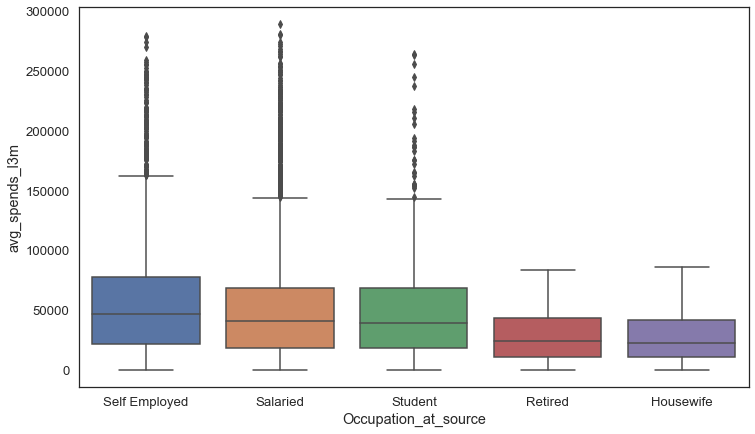

In [150]:
plt.figure(figsize=(12,7))
sns.boxplot(x=cc['Occupation_at_source'], y=cc['avg_spends_l3m']);

Retired and housewives are not spending much. 

In [151]:
crstab=pd.crosstab(cc['Occupation_at_source'],cc['card_type'],margins=True)
crstab

card_type,aura,cashback,centurion,chartered,edge,elite,gold,indianoil,platinum,prime,prosperity,pulse,rewards,shoprite,smartearn,All
Occupation_at_source,,,,,,,,,,,,,,,,
Housewife,38,57,1,0,0,0,6,46,0,0,1,1,106,62,66,384
Retired,155,158,0,4,4,1,13,147,0,1,2,1,279,152,172,1089
Salaried,319,309,35,478,512,50,73,315,35,58,531,45,752,312,355,4179
Self Employed,87,112,23,371,382,36,40,126,17,46,390,43,262,117,123,2175
Student,53,40,3,70,82,9,13,46,7,7,83,11,103,45,49,621
All,652,676,62,923,980,96,145,680,59,112,1007,101,1502,688,765,8448


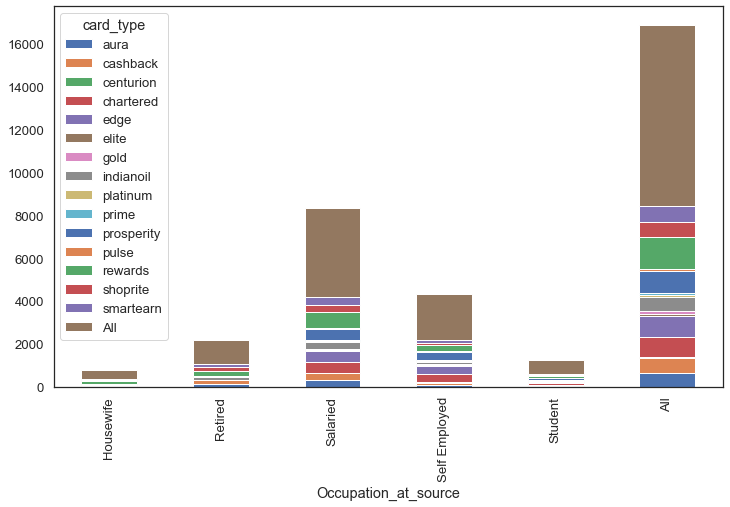

In [152]:
crstab.plot.bar(stacked=True,figsize=(12,7));

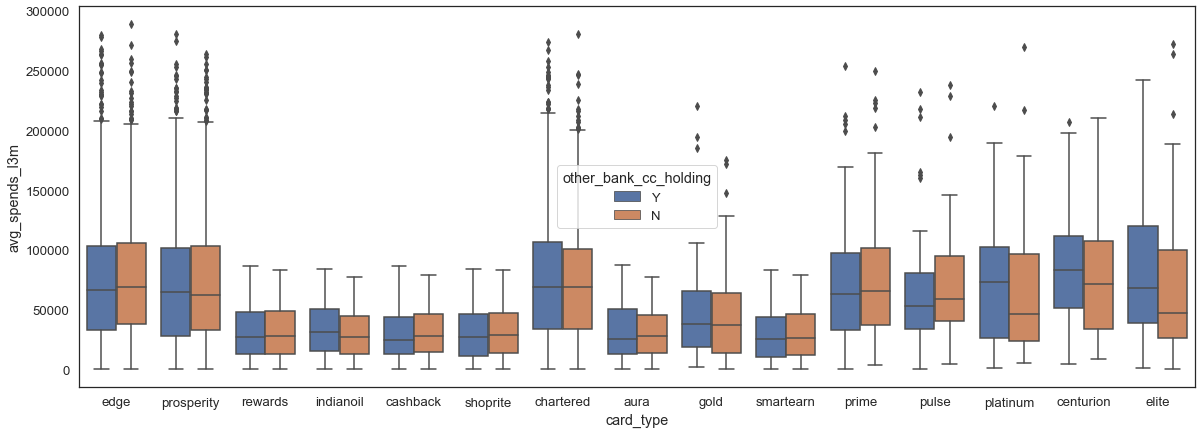

In [153]:
plt.figure(figsize=(20,7))
sns.boxplot(x=cc['card_type'],y=cc['avg_spends_l3m'],hue=cc['other_bank_cc_holding']);

In [154]:
cc.groupby('card_type')[['avg_spends_l3m']].mean().sort_values(by='avg_spends_l3m',ascending=False)

,avg_spends_l3m
card_type,
centurion,82440.564516
prime,80403.357143
edge,78981.873469
chartered,77330.923077
elite,76668.229167
prosperity,75789.428004
platinum,73599.711864
pulse,69031.188119
gold,46164.641379


In [155]:
cc.columns

Index(['Issuer', 'card_type', 'card_source_date', 'high_networth', 'active_30',
       'active_60', 'active_90', 'cc_active30', 'cc_active60', 'cc_active90',
       'hotlist_flag', 'widget_products', 'engagement_products',
       'annual_income_at_source', 'other_bank_cc_holding', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'Transactor_revolver',
       'avg_spends_l3m', 'Occupation_at_source', 'cc_limit'],
      dtype='object')